In [143]:
import rays
import surface
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [504]:
def imshow_jones_pupil(amplitudes,phases,normalized=True,diag_vmin=None,diag_vmax=None,figsize=None,zero_mean_phase=False):
    
    plt.figure(figsize=figsize)

    plt.subplot(2,4, 1)
    plt.title('I')
    plt.imshow(amplitudes[:,:,0,0], cmap='inferno',vmin=diag_vmin,vmax=diag_vmax)
    plt.colorbar()

    plt.subplot(2,4, 2)
    plt.title('I')
    plt.imshow(amplitudes[:,:,0,1], cmap='inferno')
    plt.colorbar()
    
    plt.subplot(2,4, 5)
    plt.title('I')
    plt.imshow(amplitudes[:,:,1,0], cmap='inferno')
    plt.colorbar()
    
    plt.subplot(2,4, 6)
    plt.title('I')
    plt.imshow(amplitudes[:,:,1,1], cmap='inferno',vmin=diag_vmin,vmax=diag_vmax)
    plt.colorbar()
    
        #Phase 
    plt.subplot(2,4, 3)
    plt.title('I')
    if zero_mean_phase:
        plt.imshow((phases[:,:,0,0]-np.nanmean(phases[:,:,0,0])), cmap='coolwarm')
    else:
        plt.imshow((phases[:,:,0,0]), cmap='coolwarm')
#     plt.imshow((phases[:,:,0,0]), plt.get_cmap('cmr.fusion'))

    plt.colorbar()

    plt.subplot(2,4, 4)
    plt.title('I')
    if zero_mean_phase:
        plt.imshow((phases[:,:,0,1]-np.nanmean(phases[:,:,0,1])) , cmap='coolwarm')
    else:
        plt.imshow((phases[:,:,0,1]) , cmap='coolwarm')
    plt.colorbar()
    
    plt.subplot(2,4, 7)
    plt.title('I')
    if zero_mean_phase:
        plt.imshow((phases[:,:,1,0]) , cmap='coolwarm')
    else:
        plt.imshow((phases[:,:,1,0]-np.nanmean(phases[:,:,1,0])) , cmap='coolwarm')
    plt.colorbar()
    
    plt.subplot(2,4, 8)
    plt.title('I')
    if zero_mean_phase:
        plt.imshow((phases[:,:,1,1]-np.nanmean(phases[:,:,1,1])) , cmap='coolwarm')
    else:
        plt.imshow((phases[:,:,1,1]) , cmap='coolwarm')
    plt.colorbar()

In [467]:
## Gemini Primary
gemini_primary_roc = 28.800 #meters 
gemini_primary_K = -1.003756 # Conic Constant
gemini_primary_diameter = 8.0

## Gemini Secondary
gemini_secondary_roc = 4.1930685 #meters 
gemini_secondary_K = -1.612898 # Conic Constant
gemini_secondary_diameter = 1.022

In [397]:
X = [1,0,0]
Y = [0,1,0]
Z = [0,0,1]

## Here we will point the telescope up! 
gemini_primary = surface.conic_Surface([0,0,0],[Z,Y,X],gemini_primary_diameter,
                                       gemini_primary_roc,gemini_primary_K)
gemini_secondary = surface.conic_Surface([0,0,12.539326],[Z,Y,X],gemini_secondary_diameter,
                                       gemini_secondary_roc,gemini_secondary_K,side="bottom")


primary_focus_distance = 14.4
primary_focal_plane = surface.plane([0,0,primary_focus_distance],[X,Y,Z],np.inf,[0,0,1])
back_focal_distance = -4.2
secondary_focal_plane = surface.plane([0,0,back_focal_distance],[X,Y,Z],np.inf,[0,0,-1])

In [401]:
ray0_r0 = [0.,3.,100]
ray0_k0 = [0,0,-1.]

ray0 = rays.Ray(ray0_r0,ray0_k0)

In [402]:
ray0.propagate_to_surface(gemini_primary)
print(ray0.current_position)
print(ray0.current_propagation_direction)
print("\n")
ray0.propagate_to_surface(gemini_secondary)
print(ray0.current_position)
print(ray0.current_propagation_direction)
print("\n")
# # ray0.propagate_to_surface(primary_focal_plane)
ray0.propagate_to_surface(secondary_focal_plane)
print(ray0.current_position)
print(ray0.current_propagation_direction)
print("\n")


[0.         3.         0.15624841]
[ 0.         -0.20609293  0.97853242]


[ 0.          0.38816754 12.55726951]
[ 0.         -0.02343751 -0.9997253 ]


[ 0.         -0.00468905 -4.2       ]
[-0.          0.02343751  0.9997253 ]




In [403]:
ranges = [[-4,4],[-4.,4]]
unit_vectors = [X,Y]
plane_vertex = [0,0,100]
direction=[0,0,-1]
nrays = 20

ray_bundle = rays.Ray_Bundle()

ray_bundle.generate_ray_bundle(ranges, unit_vectors, plane_vertex, direction,nrays)
ray_bundle.propagate_to_surface(gemini_primary)
ray_bundle.propagate_to_surface(gemini_secondary)
ray_bundle.propagate_to_surface(secondary_focal_plane)

In [404]:
xy_positions = []

for i in range(len(ray_bundle.rays)):
    xy_positions.append(ray_bundle.rays[i].current_position[:2])
xy_positions = np.array(xy_positions)

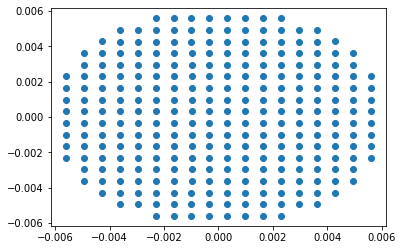

In [405]:
plt.plot(xy_positions[:,0],xy_positions[:,1],'o')

In [406]:
max_ray_distance = []
back_focal_distances = np.arange(-4.5,-3.5,0.001)
for i in back_focal_distances:
    
    secondary_focal_plane = surface.plane([0,0,i],[X,Y,Z],np.inf,[0,0,-1])
    
    ranges = [[-8,8],[-8,8]]
    unit_vectors = [X,Y]
    plane_vertex = [0,0,100]
    direction=[0,0,-1]
    nrays = 20

    ray_bundle = rays.Ray_Bundle()

    ray_bundle.generate_ray_bundle(ranges, unit_vectors, plane_vertex, direction,nrays)
    ray_bundle.propagate_to_surface(gemini_primary)
    ray_bundle.propagate_to_surface(gemini_secondary)
    ray_bundle.propagate_to_surface(secondary_focal_plane)

    xy_positions = []

    for i in range(len(ray_bundle.rays)):
        xy_positions.append(ray_bundle.rays[i].current_position[:2])
    xy_positions = np.array(xy_positions)
    
    ray_distances = np.sqrt(xy_positions[:,0]**2+xy_positions[:,1]**2)
    
    max_ray_distance.append(np.nanmax(ray_distances))

(0, 0.0025)

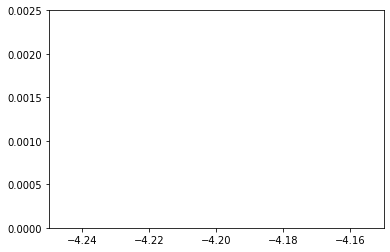

In [407]:
plt.plot(back_focal_distances,max_ray_distance)
plt.xlim(-4.25,-4.15)
plt.ylim(0,0.0025)

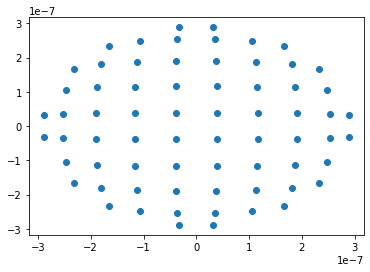

In [408]:
secondary_focal_plane = surface.plane([0,0,back_focal_distances[max_ray_distance == np.nanmin(max_ray_distance)]],
                                      [X,Y,Z],np.inf,[0,0,-1])

ranges = [[-8,8],[-8,8]]
unit_vectors = [X,Y]
plane_vertex = [0,0,100]
direction=[0,0,-1]
nrays = 20

ray_bundle = rays.Ray_Bundle()

ray_bundle.generate_ray_bundle(ranges, unit_vectors, plane_vertex, direction,nrays)
ray_bundle.propagate_to_surface(gemini_primary)
ray_bundle.propagate_to_surface(gemini_secondary)
ray_bundle.propagate_to_surface(secondary_focal_plane)

xy_positions = []

for i in range(len(ray_bundle.rays)):
    xy_positions.append(ray_bundle.rays[i].current_position[:2])
xy_positions = np.array(xy_positions)

plt.plot(xy_positions[:,0],xy_positions[:,1],'o')

In [409]:
back_focal_distances[max_ray_distance == np.nanmin(max_ray_distance)]

array([-4.])

## Ok, now let's start considering the polarization matrices!

In [475]:
## Gemini Primary
gemini_primary_roc = 28.800 #meters 
gemini_primary_K = -1.003756 # Conic Constant
gemini_primary_diameter = 8.0

## Gemini Secondary
gemini_secondary_roc = 4.1930685 #meters 
gemini_secondary_K = -1.612898 # Conic Constant
gemini_secondary_diameter = 1.022

#From the refractiveindex.info
# @1.6micron
n_air = 1.000277
n_Ag = 0.14908+11.769j #Johnson and Christy 1972
n_Ag = 0.28290+11.614j #Choi et al. 2020

n_Al = 2.80+8.45j
d_Al = 1000 #Really big doesn't matter for one layer here. 

n_Si3N4 = 2.4622+0.00003j
d_Si3N4 = 15e-9 #Protective layer coating thickness in meters

n_indices =[n_Ag,n_Si3N4]
layer_thicknesses = [d_Si3N4]

## Just testing with alunimum
# n_indices = [n_Al]
# layer_thicknesses = [d_Al]



gemini_primary = surface.conic_Surface([0,0,0],[Z,Y,X],gemini_primary_diameter,
                                       gemini_primary_roc,gemini_primary_K,
                                       n_indices = n_indices,layer_thicknesses=layer_thicknesses)
gemini_secondary = surface.conic_Surface([0,0,12.539326],[Z,Y,X],gemini_secondary_diameter,
                                       gemini_secondary_roc,gemini_secondary_K,side="bottom",
                                         n_indices = n_indices,layer_thicknesses=layer_thicknesses)


In [476]:
ray0_r0 = [0.,4.,100]
ray0_k0 = [0,0,-1.]

ray0 = rays.Ray(ray0_r0,ray0_k0)

In [477]:
ray0.propagate_to_surface(gemini_primary)
# ray0.current_propagation_direction

In [478]:
ray0.current_position

array([0.        , 4.        , 0.27777275])

In [479]:
ray0.current_propagation_direction

array([ 0.        , -0.27251132,  0.96215258])

In [480]:
ray0.get_polarization_matrix(gemini_primary,wavelength=1.6e-6)

In [481]:
ray0.P_matrices

[array([[-0.90429347-0.23981418j,  0.        +0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        , -0.86773244-0.23463744j, -0.24576862-0.06645657j],
        [ 0.        +0.j        ,  0.27251132+0.j        , -0.96215258+0.j        ]])]

In [482]:
ray0.get_polarization_matrix(gemini_primary,wavelength=1.6e-6)
ray0.P_matrices

[array([[-0.90429347-0.23981418j,  0.        +0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        , -0.86773244-0.23463744j, -0.24576862-0.06645657j],
        [ 0.        +0.j        ,  0.27251132+0.j        , -0.96215258+0.j        ]]),
 array([[-0.90429347-0.23981418j,  0.        +0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        , -0.86773244-0.23463744j, -0.24576862-0.06645657j],
        [ 0.        +0.j        ,  0.27251132+0.j        , -0.96215258+0.j        ]])]

### Now again try this with the ray bundles

In [483]:
wavelength=1.6e-6
ranges = [[-4,4],[-4.,4]]
unit_vectors = [X,Y]
plane_vertex = [0,0,100]
direction=[0,0,-1]
nrays = 20

ray_bundle = rays.Ray_Bundle()

ray_bundle.generate_ray_bundle(ranges, unit_vectors, plane_vertex, direction,nrays)
ray_bundle.propagate_to_surface(gemini_primary)
ray_bundle.get_polarization_matrix(gemini_primary,wavelength=wavelength)
ray_bundle.propagate_to_surface(gemini_secondary)
ray_bundle.get_polarization_matrix(gemini_secondary,wavelength=wavelength)
ray_bundle.propagate_to_surface(secondary_focal_plane,reflection=False)

In [484]:
ray_bundle.rays[26].current_position

array([ 2.68888958e-07,  1.10718982e-07, -4.00000000e+00])

In [485]:
np.set_printoptions(linewidth=400)
np.set_printoptions(threshold=np.inf)

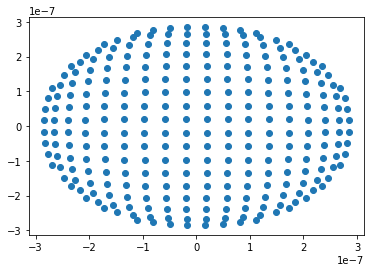

In [486]:
xy_positions = []

for i in range(len(ray_bundle.rays)):
    xy_positions.append(ray_bundle.rays[i].current_position[:2])
xy_positions = np.array(xy_positions)

plt.plot(xy_positions[:,0],xy_positions[:,1],'o')

In [487]:
xy_positions[26]

array([2.68888958e-07, 1.10718982e-07])

### Now we want to define the exit pupil. This will be at the second mirror. 

In [488]:
## Gemini Exit Pupil is at Secondary location, but is a sphere  
gemini_secondary_roc = 12.539326+4.194 #meters 
gemini_exit_pupil_K = 0 #K=0 for a sphere
gemini_secondary_diameter = 1.022

gemini_exit_pupil = surface.conic_Surface([0,0,12.539326],[Z,Y,X],gemini_secondary_diameter*2,
                                       gemini_secondary_roc,gemini_secondary_K,side="bottom")

import copy
#We'll make a copy of the ray_bundle.
exit_ray_bundle = copy.deepcopy(ray_bundle)
#Let's now reverse the rays. 
print(exit_ray_bundle.rays[26].current_propagation_direction)
exit_ray_bundle.propagate_to_surface(gemini_exit_pupil)

for i in range(len(exit_ray_bundle.rays)):
    exit_ray_bundle.rays[i].current_propagation_direction = - np.array(exit_ray_bundle.rays[i].past_directions[-1])


[ 0.02796053  0.01151316 -0.99954272]


## TODO: Now get the jones Pupil

In [489]:
exit_ray_bundle.get_jones_pupil(o_E)

In [647]:
amps = np.zeros([nrays,nrays,2,2])
phases = np.zeros([nrays,nrays,2,2])

for i in range(nrays):
    for j in range(nrays):
        amps[i,j,:,:] = np.absolute(exit_ray_bundle.rays[i+nrays*j].J)
        phases[i,j,:,:] = np.angle(exit_ray_bundle.rays[i+nrays*j].J)
        
if np.nanmean(phases[:,:,1,1]) < np.nanmean(phases[:,:,0,0]):
    phases[:,:,1,1] += np.pi
    phases[:,:,0,1] += np.pi
else:
    phases[:,:,1,1] -= np.pi
    phases[:,:,0,1] -= np.pi

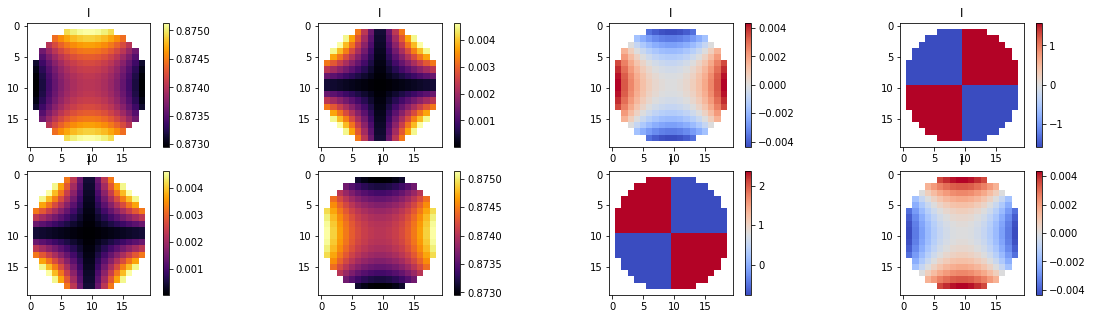

In [648]:
imshow_jones_pupil(amps,phases,figsize=(20,5),zero_mean_phase=True)

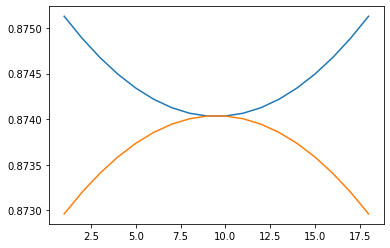

In [281]:
plt.plot(amps[:,10,0,0])
plt.plot(amps[10,:,0,0])

In [506]:
exit_ray_bundle.rays[i+nrays*j].J.shape

(2, 2)

### Let's try to calculate the diattenuation and the retardation

In [871]:
import scipy.linalg as sl
jones_pupil = np.zeros([nrays,nrays,2,2],dtype=complex) #a 2x2 jones matrix for each ray
for i in range(nrays):
    for j in range(nrays):
        try: 
            jones_pupil[i,j] = exit_ray_bundle.rays[i+nrays*j].J
        except:
            jones_pupil[i,j] = np.array([[np.nan+1j*np.nan,np.nan+1j*np.nan],[np.nan+1j*np.nan,np.nan+1j*np.nan]])
    if not np.isfinite(np.real(jones_pupil[i,j,0,0])):
        jones_pupil[i,j] = np.array([[np.nan+1j*np.nan,np.nan+1j*np.nan],[np.nan+1j*np.nan,np.nan+1j*np.nan]])
#First we we want a 4D array
ln_J = np.zeros([nrays,nrays,2,2],dtype=complex) #a 2x2 jones matrix for each ray

for i in range(nrays):
    for j in range(nrays):
        try: 
            ln_J[i,j] = sl.logm(exit_ray_bundle.rays[i+nrays*j].J)
        except:
            ln_J[i,j] = np.array([[np.nan,np.nan],[np.nan,np.nan]])

In [542]:
## Now get the Pauli Coefficients: 
cs = np.zeros([nrays,nrays,4],dtype=complex)

for i in range(nrays):
    for j in range(nrays):
        try: 
            cs[i,j,0] = 0.5*(ln_J[i,j][0,0]+ln_J[i,j][1,1])
        except:
            cs[i,j,0] = np.nan
            
        try: 
            cs[i,j,1] = 0.5*(ln_J[i,j][0,0]-ln_J[i,j][1,1])
        except:
            cs[i,j,1] = np.nan
            
        try: 
            cs[i,j,2] = 0.5*(ln_J[i,j][0,1]+ln_J[i,j][1,0])
        except:
            cs[i,j,2] = np.nan
            
        try: 
            cs[i,j,3] = 1j*(ln_J[i,j][0,1]-ln_J[i,j][1,0])
        except:
            cs[i,j,3] = np.nan

In [543]:
### Now get the retardance coefficients: 
deltaH = np.imag(cs[:,:,1])
delta45 = np.imag(cs[:,:,2])
deltaR = np.imag(cs[:,:,3])

#The diattenuation 
D = np.tanh(2*np.sqrt(np.real(cs[:,:,1])**2+np.real(cs[:,:,2])**2+np.real(cs[:,:,3])**2))

DH = D*np.real(cs[:,:,1])
D45 = D*np.real(cs[:,:,2])
DL = D*np.real(cs[:,:,3])

In [890]:
### Define the Pauli matrices
s0 = np.array([[1,0],
              [0,1]])

s1 = np.array([[1,0],
              [0,-1]])

s2 = np.array([[0,-1],
              [1,0]])

s3 = np.array([[0,-1*j],
              [1*j,0]])



def model_jones_pupil(p,size=20,rho_max = 9,mask = None):
    '''
    Based on coefficients from Breckinridge et al. 2015
    '''
    
    #Wavefront aberrations
    w0 = p[0] #Piston - radians
    w1 = p[1] #Tilt - radians
    w2 = p[2] #defocus - radians
    
    #Amplitude variations
    a0 = p[3]
    a1 = p[4]
    a2 = p[5]
    
    #Diattenuation
    d0 = p[6]
    d1 = p[7]
    d2 = p[8]
    
    #Retardance
    delta0 = p[9]
    delta1 = p[10]
    delta2 = p[11]
    
    y,x = np.indices([size,size],dtype=float)
    
    x -= np.mean(x)
    y -= np.mean(y)
    
    y = -y
    x = -x
    
    rho = np.sqrt(x**2+y**2)
    phi = np.arctan2(y,x)
    
#     plt.figure()
#     plt.imshow(rho)
    
#     plt.figure()
#     plt.imshow(phi)
#     plt.colorbar()

    rho = np.sqrt(x**2+y**2)
    if max is not None:
        rho[~mask] = np.nan
    rho /= np.nanmax(rho)
    phi = -np.arctan2(y,x)
        
    J = np.zeros([size,size,2,2],dtype=complex)
    
    for i in range(size):
        for j in range(size):
            
            

            J[i,j] = s0+ \
                     s1*0.5*(d0+delta0*1j - (d1+delta1*1j)*rho[i,j]*np.sin(phi[i,j]) + (d2+delta2*1j)*rho[i,j]**2*np.cos(2*phi[i,j])) + \
                     s2*0.5*((d1+delta1*1j)*rho[i,j]*np.cos(phi[i,j]) + (d2+delta2*1j)*rho[i,j]**2*np.sin(2*phi[i,j]))


            J[i,j] *= (a0 + a1*rho[i,j]*np.sin(phi[i,j]) + a2*rho[i,j]**2)
            J[i,j] *= np.exp(2j*np.pi * (w0+w1*rho[i,j]*np.sin(phi[i,j])+w2*rho[i,j]**2))
            if mask is not None:
                if not mask[i,j]:
                    J[i,j] = np.array([[np.nan+1j*np.nan,np.nan+1j*np.nan],
                                       [np.nan+1j*np.nan,np.nan+1j*np.nan]])

    J[:,:,1,1] *= np.exp(1j*np.pi)
                
    return J
    
def to_minimize(p,data,mask,size=20):
    
    model = model_jones_pupil(p,size,mask=mask)
    
    return np.nansum(np.abs((model-data)**2))

In [895]:
p0 = [np.nanmean(np.angle(jones_pupil[:,:,0,0]))/(2*np.pi),0,0,
     np.nanmean(amps[:,:,0,0]),0,0,
     0,0,-0.004,
     0,0,0.012]

In [896]:
mask = np.isfinite(amps[:,:,0,0])
for i in range(nrays):
    for j in range(nrays):
        if not mask[i,j]:
            jones_pupil[i,j] = np.array([[np.nan+1j*np.nan,np.nan+1j*np.nan],
                                       [np.nan+1j*np.nan,np.nan+1j*np.nan]])

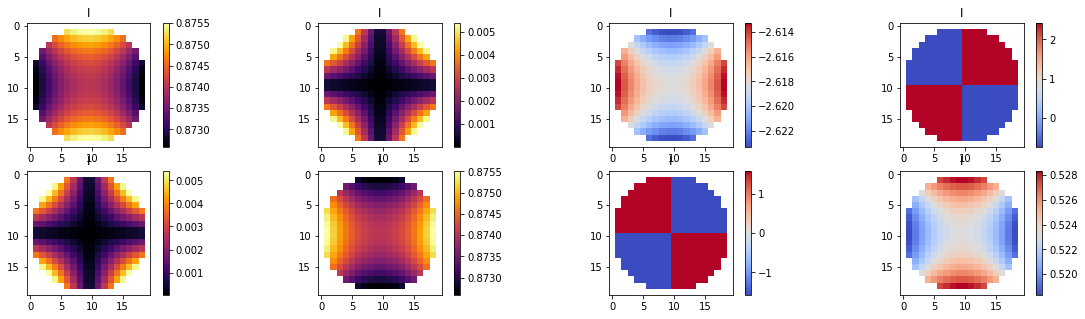

In [897]:
J0 = model_jones_pupil(p0,mask=mask)

J0_amps = np.zeros([nrays,nrays,2,2])
J0_phases = np.zeros([nrays,nrays,2,2])

for i in range(nrays):
    for j in range(nrays):
        J0_amps[i,j,:,:] = np.absolute(J0[i,j])
        J0_phases[i,j,:,:] = np.angle(J0[i,j])
        
imshow_jones_pupil(J0_amps,J0_phases,figsize=(20,5),zero_mean_phase=False)

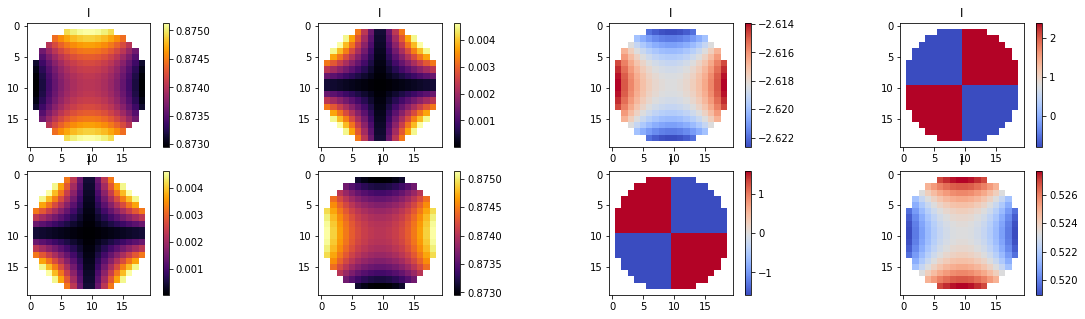

In [898]:
amps = np.zeros([nrays,nrays,2,2])
phases = np.zeros([nrays,nrays,2,2])

for i in range(nrays):
    for j in range(nrays):
        amps[i,j,:,:] = np.absolute(jones_pupil[i,j])
        phases[i,j,:,:] = np.angle(jones_pupil[i,j])
        
imshow_jones_pupil(amps,phases,figsize=(20,5),zero_mean_phase=False)

In [899]:
import scipy.optimize as so
fit_results = so.minimize(to_minimize,p0,args = (jones_pupil,mask))

In [900]:
fit_results.x

array([-4.16712720e-01, -7.45700585e-09, -3.75504155e-07,  8.74036979e-01, -7.58532109e-09, -4.81862665e-07, -7.38399838e-09, -7.58274594e-09, -2.98536973e-03, -7.34576692e-09, -7.45352350e-09,  1.04575773e-02])

In [ ]:
1.2e-4

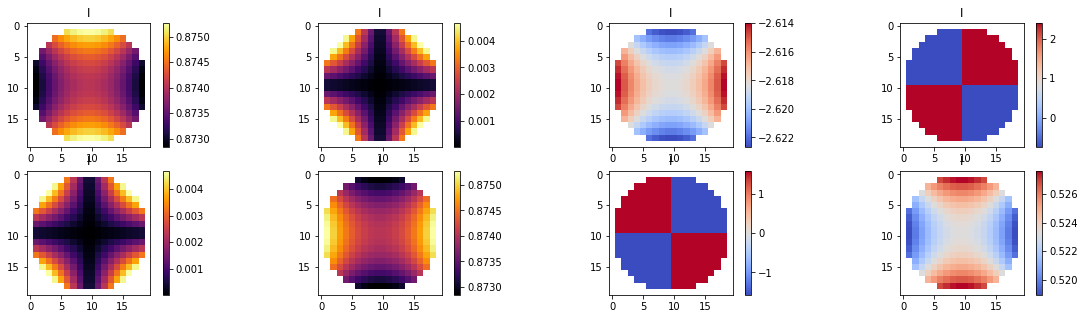

In [882]:
J_fit = model_jones_pupil(fit_results.x,mask=mask)

J_fit_amps = np.zeros([nrays,nrays,2,2])
J_fit_phases = np.zeros([nrays,nrays,2,2])

for i in range(nrays):
    for j in range(nrays):
        J_fit_amps[i,j,:,:] = np.absolute(J_fit[i,j])
        J_fit_phases[i,j,:,:] = np.angle(J_fit[i,j])
        
# if np.nanmean(J_fit_phases[:,:,1,1]) < np.nanmean(J_fit_phases[:,:,0,0]):
#     J_fit_phases[:,:,1,1] += np.pi
# else:
#     J_fit_phases[:,:,1,1] -= np.pi
imshow_jones_pupil(J_fit_amps,J_fit_phases,figsize=(20,5),zero_mean_phase=False)

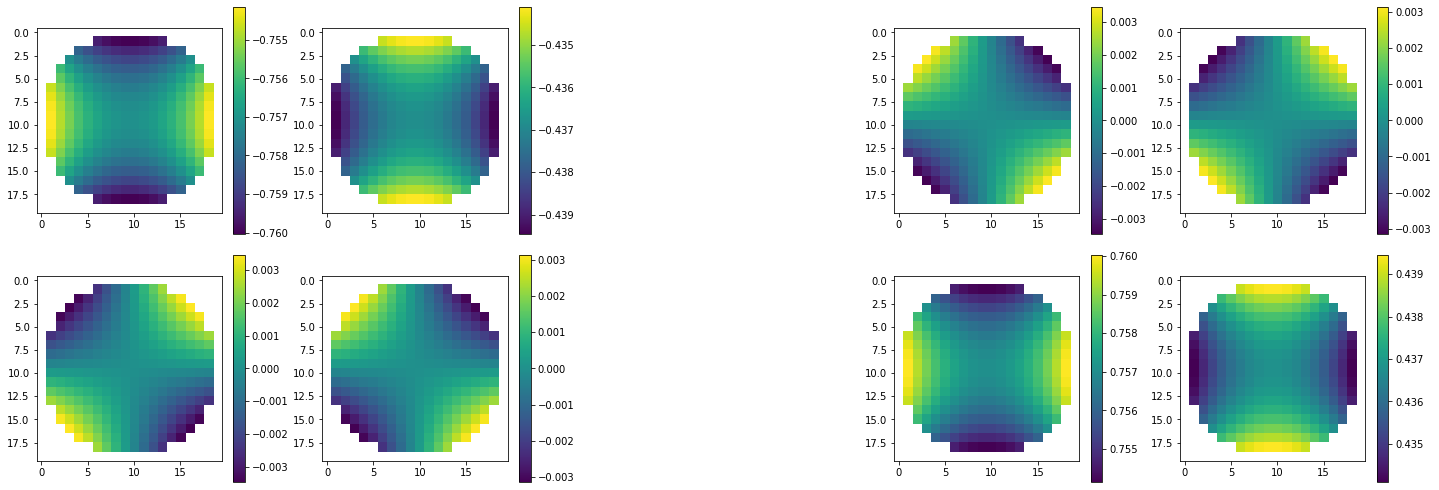

In [883]:
fig,axes = plt.subplots(2,5,figsize=(20,7))

im0 = axes[0,0].imshow(np.real(J_fit[:,:,0,0]))
im1 = axes[0,3].imshow(np.real(J_fit[:,:,0,1]))
im2 = axes[1,0].imshow(np.real(J_fit[:,:,1,0]))
im3 = axes[1,3].imshow(np.real(J_fit[:,:,1,1]))

plt.colorbar(im0,ax=axes[0,0])
plt.colorbar(im1,ax=axes[0,3])
plt.colorbar(im2,ax=axes[1,0])
plt.colorbar(im3,ax=axes[1,3])


im0 = axes[0,1].imshow(np.imag(J_fit[:,:,0,0]))
im1 = axes[0,4].imshow(np.imag(J_fit[:,:,0,1]))
im2 = axes[1,1].imshow(np.imag(J_fit[:,:,1,0]))
im3 = axes[1,4].imshow(np.imag(J_fit[:,:,1,1]))

plt.colorbar(im0,ax=axes[0,1])
plt.colorbar(im1,ax=axes[0,4])
plt.colorbar(im2,ax=axes[1,1])
plt.colorbar(im3,ax=axes[1,4])

axes[0,2].set_axis_off()
axes[1,2].set_axis_off()

plt.tight_layout()

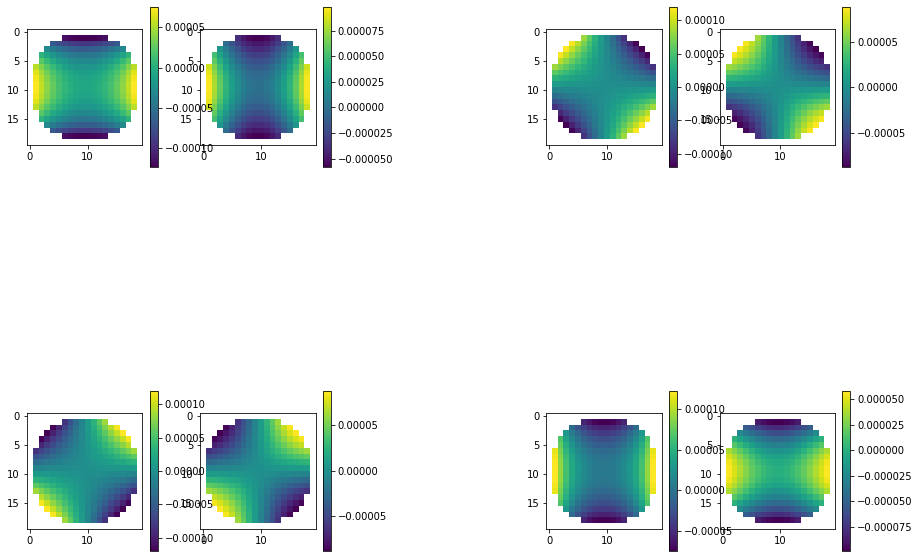

In [884]:
resids = (J_fit-jones_pupil)

fig,axes = plt.subplots(3,5,figsize=(15,10))

im0 = axes[0,0].imshow(np.real(resids[:,:,0,0]))
im1 = axes[0,3].imshow(np.real(resids[:,:,0,1]))
im2 = axes[2,0].imshow(np.real(resids[:,:,1,0]))
im3 = axes[2,3].imshow(np.real(resids[:,:,1,1]))

plt.colorbar(im0,ax=axes[0,0])
plt.colorbar(im1,ax=axes[0,3])
plt.colorbar(im2,ax=axes[2,0])
plt.colorbar(im3,ax=axes[2,3])


im0 = axes[0,1].imshow(np.imag(resids[:,:,0,0]))
im1 = axes[0,4].imshow(np.imag(resids[:,:,0,1]))
im2 = axes[2,1].imshow(np.imag(resids[:,:,1,0]))
im3 = axes[2,4].imshow(np.imag(resids[:,:,1,1]))

plt.colorbar(im0,ax=axes[0,1])
plt.colorbar(im1,ax=axes[0,4])
plt.colorbar(im2,ax=axes[2,1])
plt.colorbar(im3,ax=axes[2,4])

axes[0,2].set_axis_off()
axes[1,2].set_axis_off()
axes[2,2].set_axis_off()
axes[1,0].set_axis_off()
axes[1,1].set_axis_off()
axes[1,3].set_axis_off()
axes[1,4].set_axis_off()

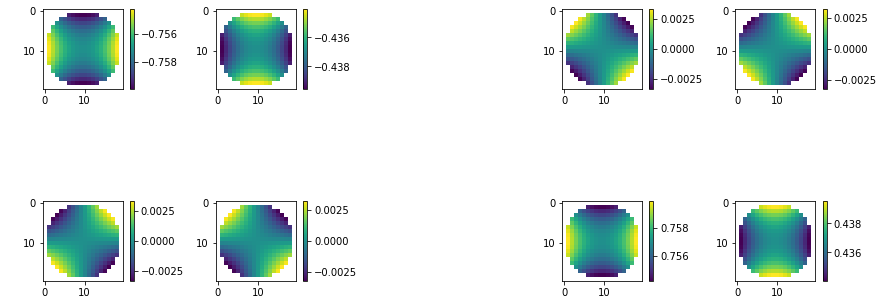

In [885]:
fig,axes = plt.subplots(3,5,figsize=(15,5))

im0 = axes[0,0].imshow(np.real(jones_pupil[:,:,0,0]))
im1 = axes[0,3].imshow(np.real(jones_pupil[:,:,0,1]))
im2 = axes[2,0].imshow(np.real(jones_pupil[:,:,1,0]))
im3 = axes[2,3].imshow(np.real(jones_pupil[:,:,1,1]))

plt.colorbar(im0,ax=axes[0,0])
plt.colorbar(im1,ax=axes[0,3])
plt.colorbar(im2,ax=axes[2,0])
plt.colorbar(im3,ax=axes[2,3])


im0 = axes[0,1].imshow(np.imag(jones_pupil[:,:,0,0]))
im1 = axes[0,4].imshow(np.imag(jones_pupil[:,:,0,1]))
im2 = axes[2,1].imshow(np.imag(jones_pupil[:,:,1,0]))
im3 = axes[2,4].imshow(np.imag(jones_pupil[:,:,1,1]))

plt.colorbar(im0,ax=axes[0,1])
plt.colorbar(im1,ax=axes[0,4])
plt.colorbar(im2,ax=axes[2,1])
plt.colorbar(im3,ax=axes[2,4])

axes[0,2].set_axis_off()
axes[1,2].set_axis_off()
axes[2,2].set_axis_off()
axes[1,0].set_axis_off()
axes[1,1].set_axis_off()
axes[1,3].set_axis_off()
axes[1,4].set_axis_off()

## Let's check the amplitude coefficients as a function of aoi

In [283]:
from interfaces import *

Text(0, 0.5, 'Reflectance')

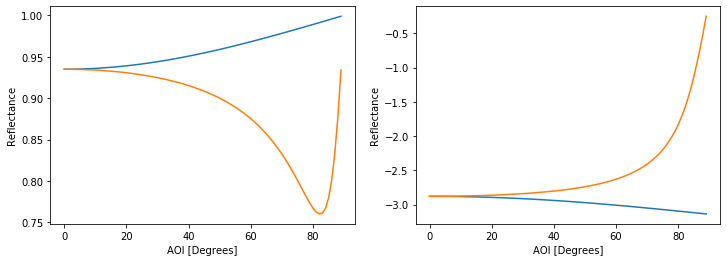

In [284]:
### Protected Silver

r_ss = []
r_ps = []

aois = np.arange(0,90)
for aoi in aois:
    r_s,r_p = get_single_film_amplitude_coefficients(np.radians(aoi),n_air,n_indices[0],n_indices[1],layer_thicknesses[0], 
                                            wavelength,reflected=True)
    r_ss.append(r_s)
    r_ps.append(-r_p)

fig,axes = plt.subplots(1,2,figsize=(12,4))

axes[0].plot(aois,np.absolute(r_ss))
axes[0].plot(aois,np.absolute(r_ps))
axes[0].set_xlabel("AOI [Degrees]")
axes[0].set_ylabel("Reflectance")


axes[1].plot(aois,np.angle(r_ss))
axes[1].plot(aois,np.angle(r_ps))
axes[1].set_xlabel("AOI [Degrees]")
axes[1].set_ylabel("Reflectance")

In [285]:
## Bare Aluminum
r_ss2 = []
r_ps2 = []

aois = np.arange(0,90)
for aoi in aois:
    r_s,r_p = get_uncoated_amplitude_coefficients(np.radians(aoi),n_air,n_Al,reflected=True)
    r_ss2.append(r_s)
    r_ps2.append(-r_p)

In [286]:
#Gold!
n_Au = 0.34020+10.960j #Gold!

r_ss3 = []
r_ps3 = []

aois = np.arange(0,90)
for aoi in aois:
    r_s,r_p = get_uncoated_amplitude_coefficients(np.radians(aoi),n_air,n_Au,reflected=True)
    r_ss3.append(r_s)
    r_ps3.append(-r_p)

Text(0, 0.5, 'Retardation [$^o$]')

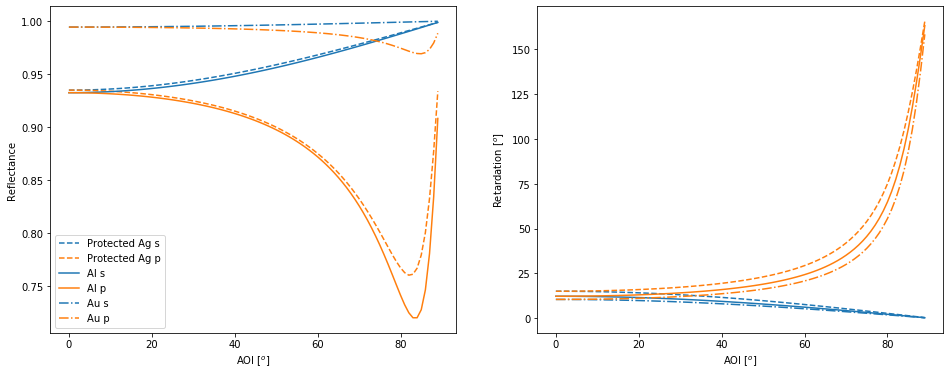

In [287]:
fig,axes = plt.subplots(1,2,figsize=(16,6))

axes[0].plot(aois,np.absolute(r_ss),'C0--',label="Protected Ag s")
axes[0].plot(aois,np.absolute(r_ps),'C1--',label="Protected Ag p")
axes[0].plot(aois,np.absolute(r_ss2),'C0',label="Al s")
axes[0].plot(aois,np.absolute(r_ps2),'C1',label="Al p")
axes[0].plot(aois,np.absolute(r_ss3),'C0-.',label="Au s")
axes[0].plot(aois,np.absolute(r_ps3),'C1-.',label="Au p")
axes[0].set_xlabel(r"AOI [$^o$]")
axes[0].set_ylabel("Reflectance")
axes[0].legend()

axes[1].plot(aois,(np.angle(r_ss) *180/np.pi + 180),'C0--')
axes[1].plot(aois,(np.angle(r_ps) *180/np.pi + 180),'C1--')
axes[1].plot(aois,(np.angle(r_ss2)*180/np.pi + 180),'C0')
axes[1].plot(aois,(np.angle(r_ps2)*180/np.pi + 180),'C1')
axes[1].plot(aois,(np.angle(r_ss3)*180/np.pi + 180),'C0-.')
axes[1].plot(aois,(np.angle(r_ps3)*180/np.pi + 180),'C1-.')


axes[1].set_xlabel(r"AOI [$^o$]")
axes[1].set_ylabel(r"Retardation [$^o$]")

In [288]:
## Now what are the AOIs of the primary and secondary? 

In [289]:
exit_ray_bundle.rays[26].past_directions

[[0, 0, -1],
 array([0.24412079, 0.10052032, 0.96452097]),
 array([ 0.02796053,  0.01151316, -0.99954272]),
 array([ 0.02796053,  0.01151316, -0.99954272])]

In [290]:
exit_ray_bundle.rays[26].past_positions

[array([ -3.57894737,  -1.47368421, 100.        ]),
 array([-3.57894737, -1.47368421,  0.26007561]),
 array([-0.46349587, -0.19085124, 12.56922115]),
 array([ 2.68888958e-07,  1.10718982e-07, -4.00000000e+00])]

In [291]:
primary_aois = np.zeros([nrays,nrays])
secondary_aois = np.zeros([nrays,nrays])

for i in range(nrays):
    for j in range(nrays):
        try: 
            primary_aois[i,j] = np.arccos(np.dot(exit_ray_bundle.rays[i+nrays*j].past_directions[0],gemini_primary.get_surface_normal(exit_ray_bundle.rays[i+nrays*j].past_positions[1])))
            secondary_aois[i,j] = np.pi-np.arccos(np.dot(exit_ray_bundle.rays[i+nrays*j].past_directions[1],-gemini_secondary.get_surface_normal(exit_ray_bundle.rays[i+nrays*j].past_positions[2])))
        except: 
            primary_aois[i,j] = np.nan
            secondary_aois[i,j] = np.nan

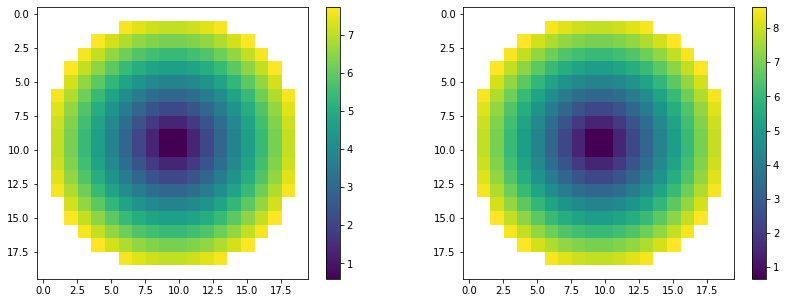

In [292]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
im0=axes[0].imshow(np.degrees(primary_aois))
plt.colorbar(im0,ax=axes[0])

im1=axes[1].imshow(np.degrees(secondary_aois))
plt.colorbar(im1,ax=axes[1])

In [293]:
print(np.nanmax(np.degrees(primary_aois)))
print(np.nanmax(np.degrees(secondary_aois)))

7.742913253492777
8.619500025110739


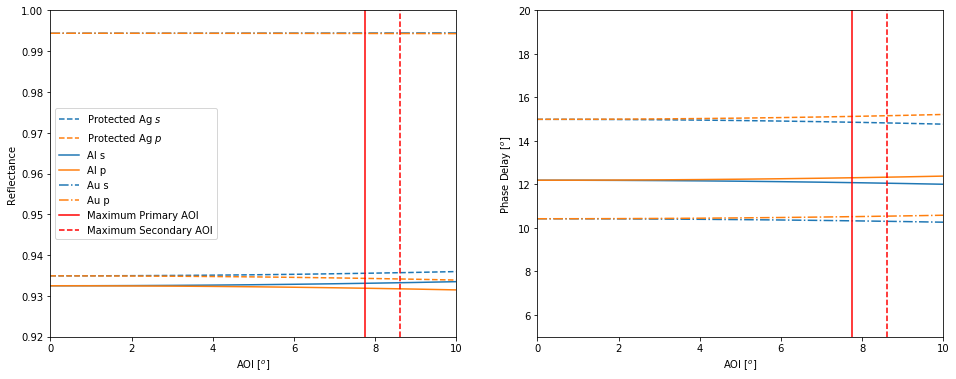

In [294]:
fig,axes = plt.subplots(1,2,figsize=(16,6))

axes[0].plot(aois,np.absolute(r_ss),'C0--',label="Protected Ag $s$")
axes[0].plot(aois,np.absolute(r_ps),'C1--',label="Protected Ag $p$")
axes[0].plot(aois,np.absolute(r_ss2),'C0',label="Al s")
axes[0].plot(aois,np.absolute(r_ps2),'C1',label="Al p")
axes[0].plot(aois,np.absolute(r_ss3),'C0-.',label="Au s")
axes[0].plot(aois,np.absolute(r_ps3),'C1-.',label="Au p")
axes[0].set_xlabel(r"AOI [$^o$]")
axes[0].set_ylabel("Reflectance")


axes[1].plot(aois,(np.angle(r_ss) *180/np.pi + 180),'C0--')
axes[1].plot(aois,(np.angle(r_ps) *180/np.pi + 180),'C1--')
axes[1].plot(aois,(np.angle(r_ss2)*180/np.pi + 180),'C0')
axes[1].plot(aois,(np.angle(r_ps2)*180/np.pi + 180),'C1')
axes[1].plot(aois,(np.angle(r_ss3)*180/np.pi + 180),'C0-.')
axes[1].plot(aois,(np.angle(r_ps3)*180/np.pi + 180),'C1-.')


# axes[0].axhline(np.absolute(r_ss[0]),color='k')
# axes[0].axhline(np.absolute(r_ss2[0]),color='k')
# axes[0].axhline(np.absolute(r_ss3[0]),color='k')


axes[0].set_xlim(0,10)
axes[1].set_xlim(0,10)

axes[0].set_ylim(0.92,1)
axes[1].set_ylim(5.,20.)

axes[0].axvline(np.nanmax(np.degrees(primary_aois)),label="Maximum Primary AOI",color="r")
axes[0].axvline(np.nanmax(np.degrees(secondary_aois)),label="Maximum Secondary AOI",color='r',linestyle="--")

axes[1].axvline(np.nanmax(np.degrees(primary_aois)),label="Maximum Primary AOI",color="r")
axes[1].axvline(np.nanmax(np.degrees(secondary_aois)),label="Maximum Secondary AOI",color='r',linestyle="--")


axes[1].set_xlabel(r"AOI [$^o$]")
axes[1].set_ylabel(r"Phase Delay [$^o$]")

axes[0].legend()

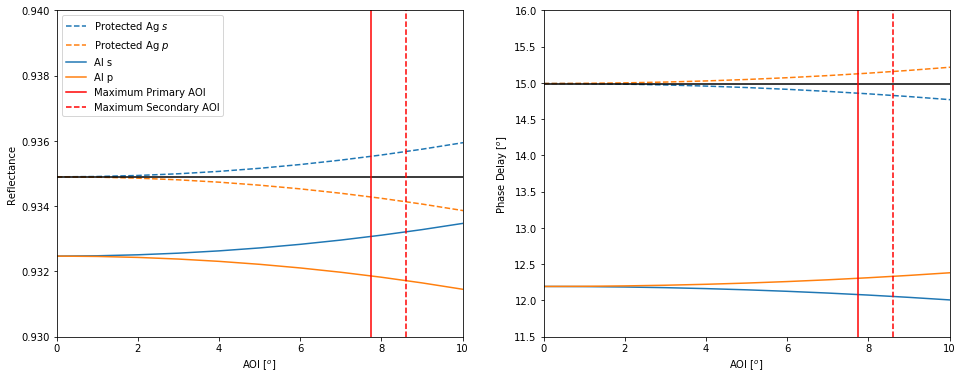

In [295]:
fig,axes = plt.subplots(1,2,figsize=(16,6))

axes[0].plot(aois,np.absolute(r_ss),'C0--',label="Protected Ag $s$")
axes[0].plot(aois,np.absolute(r_ps),'C1--',label="Protected Ag $p$")
axes[0].plot(aois,np.absolute(r_ss2),'C0',label="Al s")
axes[0].plot(aois,np.absolute(r_ps2),'C1',label="Al p")
axes[0].set_xlabel(r"AOI [$^o$]")
axes[0].set_ylabel("Reflectance")


axes[1].plot(aois,(np.angle(r_ss) *180/np.pi + 180),'C0--')
axes[1].plot(aois,(np.angle(r_ps) *180/np.pi + 180),'C1--')
axes[1].plot(aois,(np.angle(r_ss2)*180/np.pi + 180),'C0')
axes[1].plot(aois,(np.angle(r_ps2)*180/np.pi + 180),'C1')

axes[0].axhline(np.absolute(r_ss[0]),color='k')
axes[1].axhline(np.degrees(np.angle(r_ss[0]))+180,color='k')

axes[0].set_xlim(0,10)
axes[1].set_xlim(0,10)

axes[0].set_ylim(0.93,0.94)
axes[1].set_ylim(11.5,16.)

axes[0].axvline(np.nanmax(np.degrees(primary_aois)),label="Maximum Primary AOI",color="r")
axes[0].axvline(np.nanmax(np.degrees(secondary_aois)),label="Maximum Secondary AOI",color='r',linestyle="--")

axes[1].axvline(np.nanmax(np.degrees(primary_aois)),label="Maximum Primary AOI",color="r")
axes[1].axvline(np.nanmax(np.degrees(secondary_aois)),label="Maximum Secondary AOI",color='r',linestyle="--")


axes[1].set_xlabel(r"AOI [$^o$]")
axes[1].set_ylabel(r"Phase Delay [$^o$]")

axes[0].legend()

## Testing things for two rays at [0,3] and [3,0]

In [296]:
ray1_r0 = [0.,1.1,100]
ray1_k0 = [0,0,-1.]
ray1 = rays.Ray(ray1_r0,ray1_k0)

ray2_r0 = [3.99,0.,100]
ray2_k0 = [0,0,-1.]
ray2 = rays.Ray(ray2_r0,ray2_k0)

In [297]:
ray1.propagate_to_surface(gemini_primary)
ray1.get_polarization_matrix(gemini_primary,wavelength=wavelength)

 #Dipole Coordinates with poles at +/-x - CLT Equation 11.4
k_exit = ray1.current_propagation_direction
y_exit = np.array([0,-k_exit[2],k_exit[1]])/np.sqrt(k_exit[2]**2+k_exit[1]**2)
x_exit = np.cross(y_exit,k_exit)
o_X = np.array([x_exit,y_exit,k_exit])

ray1.get_jones_pupil(o_E,o_X)

In [298]:
gemini_primary.calculate_orthogonal_matrices(ray1)

(array([[ 1.,  0.,  0.],
        [ 0., -1.,  0.],
        [ 0.,  0., -1.]]), array([[ 1.        ,  0.        ,  0.        ],
        [ 0.        , -0.99708663, -0.07627741],
        [ 0.        , -0.07627741,  0.99708663]]))

In [299]:
np.linalg.inv(o_X)@ray1.P_matrices@o_E

array([[[-0.90316997-0.24168511j,  0.        +0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        ,  0.89191263+0.24058631j,  0.14473184+0.01840492j],
        [ 0.        +0.j        ,  0.14473184+0.01840492j, -0.98892797+0.00140798j]]])

In [300]:
o_E@ray1.P_matrices@np.linalg.inv(o_X)

array([[[-9.03169973e-01-2.41685106e-01j,  0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
        [ 0.00000000e+00+0.00000000e+00j,  9.02984659e-01+2.41994294e-01j, -3.02570930e-18-5.57306912e-19j],
        [ 0.00000000e+00+0.00000000e+00j,  7.83638262e-19+0.00000000e+00j, -1.00000000e+00+0.00000000e+00j]]])

In [301]:
o_E@ray1.P_matrices[0]@np.linalg.inv(o_X)

array([[-9.03169973e-01-2.41685106e-01j,  0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  9.02984659e-01+2.41994294e-01j, -3.02570930e-18-5.57306912e-19j],
       [ 0.00000000e+00+0.00000000e+00j,  7.83638262e-19+0.00000000e+00j, -1.00000000e+00+0.00000000e+00j]])

In [302]:
ray1.J

array([[-0.90316997-0.24168511j,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.90298466+0.24199429j]])

In [303]:
ray2.propagate_to_surface(gemini_primary)
ray2.get_polarization_matrix(gemini_primary,wavelength=wavelength)

 #Dipole Coordinates with poles at +/-x - CLT Equation 11.4
k_exit = ray2.current_propagation_direction
y_exit = np.array([0,-k_exit[2],k_exit[1]])/np.sqrt(k_exit[2]**2+k_exit[1]**2)
x_exit = np.cross(y_exit,k_exit)
o_X = np.array([x_exit,y_exit,k_exit])

ray2.get_jones_pupil(o_E,o_X)

In [304]:
print(np.abs(ray1.J))
# print(np.degrees(np.angle(ray1.J)))

[[0.93494796 0.        ]
 [0.         0.93484894]]


In [305]:
print(np.abs(ray2.J))
# print(np.degrees(np.angle(ray1.J)))

[[0.93425851 0.        ]
 [0.         0.93554877]]


In [306]:
rayc_r0 = [0.,0.001,100]
rayc_k0 = [0,0,-1.]
rayc = rays.Ray(rayc_r0,rayc_k0)

rayc.propagate_to_surface(gemini_primary)
rayc.get_polarization_matrix(gemini_primary,wavelength=wavelength)

 #Dipole Coordinates with poles at +/-x - CLT Equation 11.4
k_exit = rayc.current_propagation_direction
y_exit = np.array([0,-k_exit[2],k_exit[1]])/np.sqrt(k_exit[2]**2+k_exit[1]**2)
x_exit = np.cross(y_exit,k_exit)
o_X = np.array([x_exit,y_exit,k_exit])

rayc.get_jones_pupil(o_E,o_X)

rayc.J

array([[-0.90307653-0.24184015j,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.90307653+0.24184015j]])

In [307]:
np.abs(rayc.J)

array([[0.93489779, 0.        ],
       [0.        , 0.93489779]])

In [308]:
ray1_aoi = np.degrees(np.arccos(np.dot(ray1.past_directions[0],gemini_primary.get_surface_normal(ray1.current_position))))
ray2_aoi = np.degrees(np.arccos(np.dot(ray2.past_directions[0],gemini_primary.get_surface_normal(ray2.current_position))))

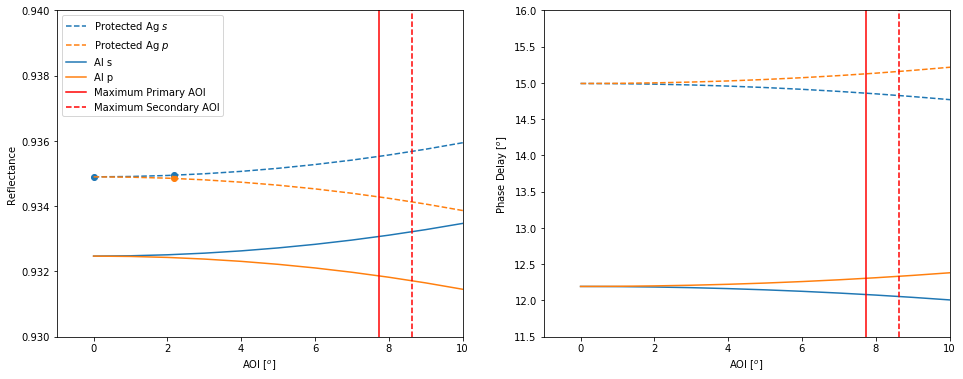

In [309]:
fig,axes = plt.subplots(1,2,figsize=(16,6))

axes[0].plot(aois,np.absolute(r_ss),'C0--',label="Protected Ag $s$")
axes[0].plot(aois,np.absolute(r_ps),'C1--',label="Protected Ag $p$")
axes[0].plot(aois,np.absolute(r_ss2),'C0',label="Al s")
axes[0].plot(aois,np.absolute(r_ps2),'C1',label="Al p")
axes[0].set_xlabel(r"AOI [$^o$]")
axes[0].set_ylabel("Reflectance")


axes[1].plot(aois,(np.angle(r_ss) *180/np.pi + 180),'C0--')
axes[1].plot(aois,(np.angle(r_ps) *180/np.pi + 180),'C1--')
axes[1].plot(aois,(np.angle(r_ss2)*180/np.pi + 180),'C0')
axes[1].plot(aois,(np.angle(r_ps2)*180/np.pi + 180),'C1')

# axes[0].plot([0,10],[np.absolute(r_ss[0]),np.absolute(r_ss[0])],color='k')
# axes[1].plot([0,10],[np.degrees(np.angle(r_ss[0]))+180,np.degrees(np.angle(r_ss[0]))+180],color='k')

# axes[0].plot([0,10],[np.absolute(r_ss2[0]),np.absolute(r_ss2[0])],color='k')
# axes[1].plot([0,10],[np.degrees(np.angle(r_ss2[0]))+180,np.degrees(np.angle(r_ss2[0]))+180],color='k')


axes[0].set_xlim(-1,10)
axes[1].set_xlim(-1,10)

axes[0].set_ylim(0.93,0.94)
axes[1].set_ylim(11.5,16.)

axes[0].axvline(np.nanmax(np.degrees(primary_aois)),label="Maximum Primary AOI",color="r")
axes[0].axvline(np.nanmax(np.degrees(secondary_aois)),label="Maximum Secondary AOI",color='r',linestyle="--")

axes[1].axvline(np.nanmax(np.degrees(primary_aois)),label="Maximum Primary AOI",color="r")
axes[1].axvline(np.nanmax(np.degrees(secondary_aois)),label="Maximum Secondary AOI",color='r',linestyle="--")


axes[1].set_xlabel(r"AOI [$^o$]")
axes[1].set_ylabel(r"Phase Delay [$^o$]")

axes[0].legend()

### Add in the ray locations
axes[0].scatter([0],[np.abs(rayc.J[0,0])])

axes[0].scatter(ray1_aoi,np.abs(ray1.J[0,0]),color='C0')
axes[0].scatter(ray1_aoi,np.abs(ray1.J[1,1]),color='C1')

## Let's do the ray bundle, but just to the primary. 

In [459]:
wavelength=1.6e-6
ranges = [[-4,4],[-4.,4]]
unit_vectors = [X,Y]
plane_vertex = [0,0,100]
direction=[0,0,-1]
nrays = 20

ray_bundle = rays.Ray_Bundle()
ray_bundle.generate_ray_bundle(ranges, unit_vectors, plane_vertex, direction,nrays)

print(ray_bundle.rays[26].current_propagation_direction)
ray_bundle.propagate_to_surface(gemini_primary)
print(ray_bundle.rays[26].current_propagation_direction)
ray_bundle.get_polarization_matrix(gemini_primary,wavelength=wavelength)

ray_bundle.propagate_to_surface(primary_focal_plane)
print(ray_bundle.rays[26].current_propagation_direction)

[0, 0, -1]
[0.24412079 0.10052032 0.96452097]
[-0.24412079 -0.10052032 -0.96452097]


In [460]:
## Gemini Exit Pupil is at Primary here location, but is a sphere  
roc = primary_focus_distance #meters 
exit_pupil_K = 0 #K=0 for a sphere
diameter = 8.0

gemini_pexit_pupil = surface.conic_Surface([0,0,0],[Z,Y,X],diameter,
                                       roc*2,exit_pupil_K,side="top")

#We'll make a copy of the ray_bundle.
pexit_ray_bundle = copy.deepcopy(ray_bundle)
#Let's now reverse the rays. 

# print(pexit_ray_bundle.rays[26].current_propagation_direction)
pexit_ray_bundle.propagate_to_surface(gemini_pexit_pupil)
print(pexit_ray_bundle.rays[26].current_propagation_direction)
for i in range(len(exit_ray_bundle.rays)):
    pexit_ray_bundle.rays[i].current_propagation_direction = -np.array(pexit_ray_bundle.rays[i].past_directions[-1])

print(pexit_ray_bundle.rays[26].current_propagation_direction)

[2.22250986e-03 9.15151120e-04 9.99997111e-01]
[0.24412079 0.10052032 0.96452097]


In [461]:
pexit_ray_bundle.rays[26].P_matrices

[array([[-0.87491137-0.23579433j,  0.01206708+0.00170774j,  0.22018294+0.0595017j ],
        [ 0.01206708+0.00170774j, -0.89924833-0.23923852j,  0.09066356+0.0245007j ],
        [-0.24412079+0.j        , -0.10052032+0.j        , -0.96452097+0.j        ]])]

In [462]:
pexit_ray_bundle.get_jones_pupil(o_E)
amps = np.zeros([nrays,nrays,2,2])
phases = np.zeros([nrays,nrays,2,2])

for i in range(nrays):
    for j in range(nrays):
        amps[i,j,:,:] = np.absolute(pexit_ray_bundle.rays[i+nrays*j].J)
        phases[i,j,:,:] = np.angle(pexit_ray_bundle.rays[i+nrays*j].J)

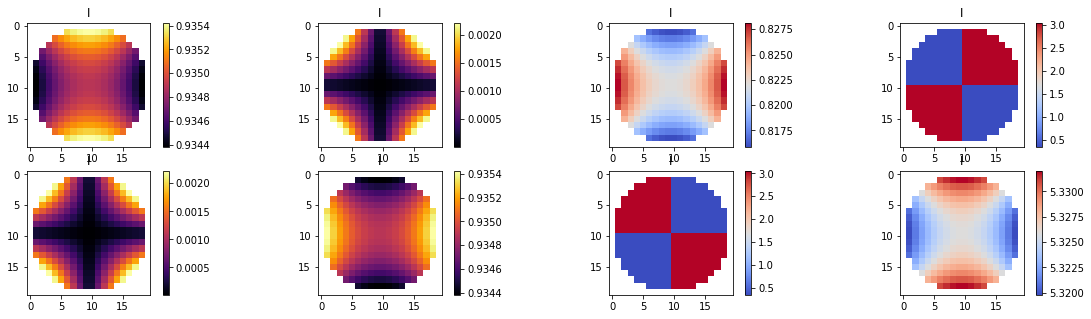

In [471]:
imshow_jones_pupil(amps,phases,figsize=(20,5))

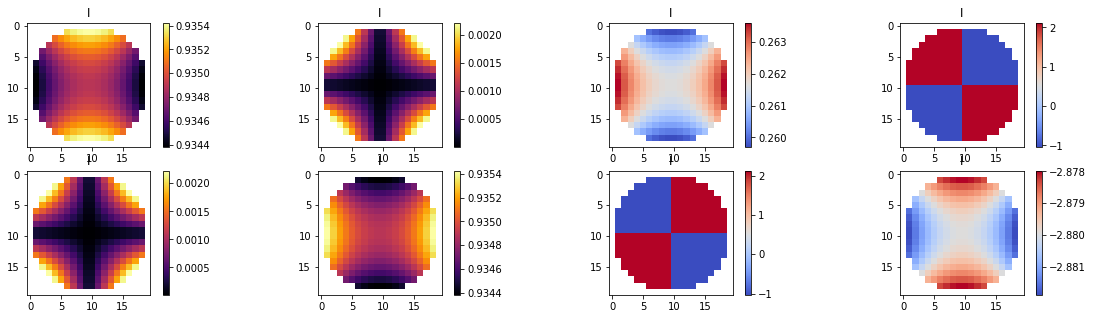

In [453]:
imshow_jones_pupil(amps,phases,figsize=(20,5))

### Ok, that looks pretty good once I switch to the double dipole coordinates, but that didn't really work before. What do the current propagation vectors looks like? 

In [65]:
x_vec = np.zeros([nrays,nrays])
y_vec = np.zeros([nrays,nrays])
z_vec =np.zeros([nrays,nrays])

In [66]:
for i in range(nrays):
    for j in range(nrays):
        x_vec[i,j] = pexit_ray_bundle.rays[i+nrays*j].current_propagation_direction[0]
        y_vec[i,j] = pexit_ray_bundle.rays[i+nrays*j].current_propagation_direction[1]
        z_vec[i,j] = pexit_ray_bundle.rays[i+nrays*j].current_propagation_direction[2]

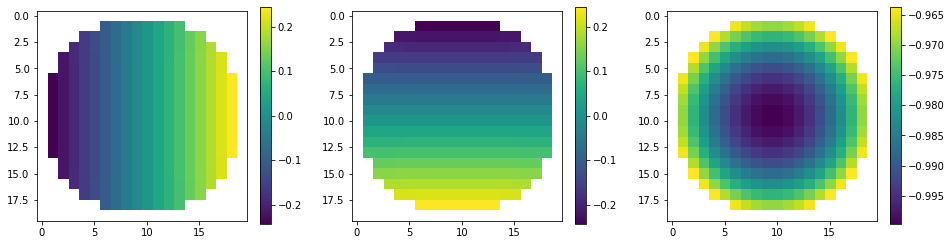

In [67]:
fig,axes = plt.subplots(1,3,figsize=(16,4))

im0 = axes[0].imshow(x_vec)
plt.colorbar(im0,ax=axes[0])
im1 = axes[1].imshow(y_vec)
plt.colorbar(im1,ax=axes[1])
im2 = axes[2].imshow(z_vec)
plt.colorbar(im2,ax=axes[2])

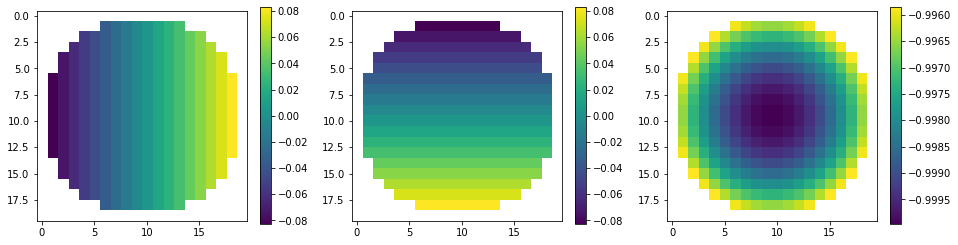

In [68]:
x_vec = np.zeros([nrays,nrays])
y_vec = np.zeros([nrays,nrays])
z_vec =np.zeros([nrays,nrays])

for i in range(nrays):
    for j in range(nrays):
        x_vec[i,j] = exit_ray_bundle.rays[i+nrays*j].current_propagation_direction[0]
        y_vec[i,j] = exit_ray_bundle.rays[i+nrays*j].current_propagation_direction[1]
        z_vec[i,j] = exit_ray_bundle.rays[i+nrays*j].current_propagation_direction[2]
        
fig,axes = plt.subplots(1,3,figsize=(16,4))

im0 = axes[0].imshow(x_vec)
plt.colorbar(im0,ax=axes[0])
im1 = axes[1].imshow(y_vec)
plt.colorbar(im1,ax=axes[1])
im2 = axes[2].imshow(z_vec)
plt.colorbar(im2,ax=axes[2])

## Ok those look pretty similar, why doesn't the orthogonal matrix look the same? 

In [69]:
po_X = np.zeros([nrays,nrays,3,3])
so_X = np.zeros([nrays,nrays,3,3])

for i in range(nrays):
    for j in range(nrays):
        pray = pexit_ray_bundle.rays[i+nrays*j]
        k_exit = pray.current_propagation_direction
        x_exit = np.array([1-k_exit[0]**2/(1+k_exit[2]),-k_exit[0]*k_exit[1]/(1+k_exit[2]),-k_exit[0]])
        y_exit = np.array([-k_exit[0]*k_exit[1]/(1+k_exit[2]),1-k_exit[1]**2/(1+k_exit[2]),-k_exit[1]])
        
        po_X[i,j] = np.array([x_exit,y_exit,k_exit])
        
        
        sray = exit_ray_bundle.rays[i+nrays*j]
        k_exit = sray.current_propagation_direction
        x_exit = np.array([1-k_exit[0]**2/(1+k_exit[2]),-k_exit[0]*k_exit[1]/(1+k_exit[2]),-k_exit[0]])
        y_exit = np.array([-k_exit[0]*k_exit[1]/(1+k_exit[2]),1-k_exit[1]**2/(1+k_exit[2]),-k_exit[1]])
        
        so_X[i,j] = np.array([x_exit,y_exit,k_exit])

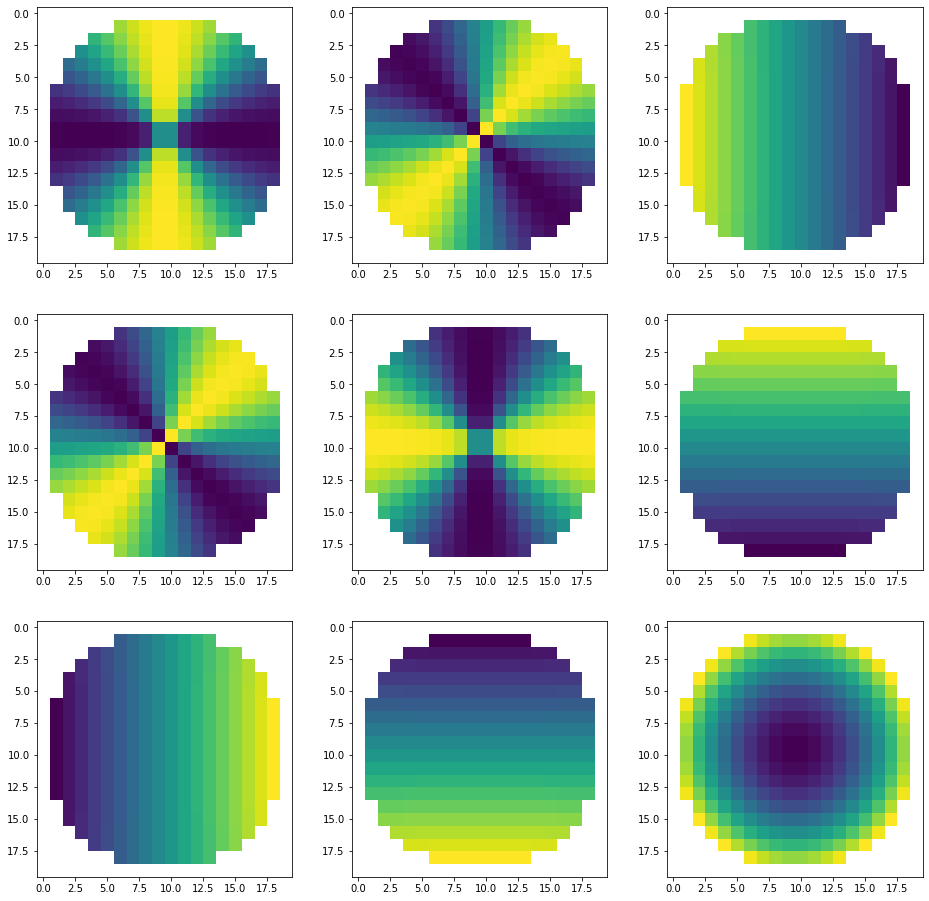

In [70]:
fig, axes = plt.subplots(3,3,figsize=(16,16))

axes[0,0].imshow(po_X[:,:,0,0])
axes[0,1].imshow(po_X[:,:,0,1])
axes[0,2].imshow(po_X[:,:,0,2])

axes[1,0].imshow(po_X[:,:,1,0])
axes[1,1].imshow(po_X[:,:,1,1])
axes[1,2].imshow(po_X[:,:,1,2])

axes[2,0].imshow(po_X[:,:,2,0])
axes[2,1].imshow(po_X[:,:,2,1])
axes[2,2].imshow(po_X[:,:,2,2])

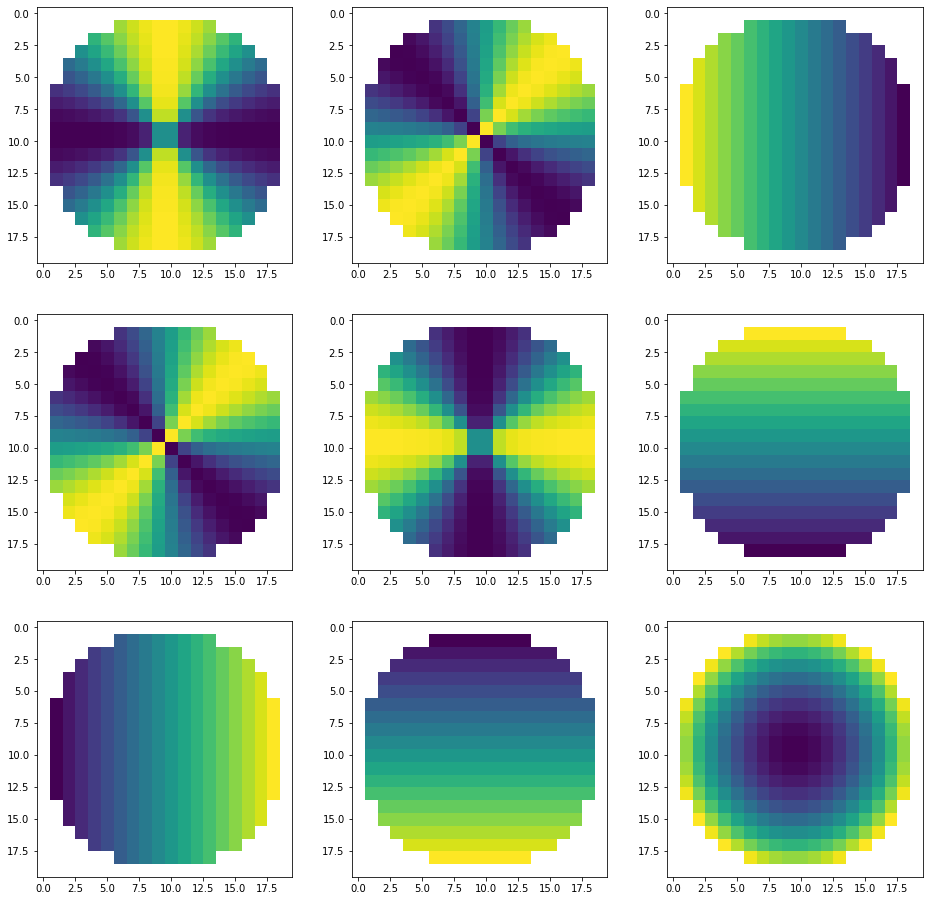

In [71]:
fig, axes = plt.subplots(3,3,figsize=(16,16))

axes[0,0].imshow(so_X[:,:,0,0])
axes[0,1].imshow(so_X[:,:,0,1])
axes[0,2].imshow(so_X[:,:,0,2])

axes[1,0].imshow(so_X[:,:,1,0])
axes[1,1].imshow(so_X[:,:,1,1])
axes[1,2].imshow(so_X[:,:,1,2])

axes[2,0].imshow(so_X[:,:,2,0])
axes[2,1].imshow(so_X[:,:,2,1])
axes[2,2].imshow(so_X[:,:,2,2])

## Ok, well how different are the p-matrices? 

In [72]:
pP = np.zeros([nrays,nrays,3,3])
sS = np.zeros([nrays,nrays,3,3])

for i in range(nrays):
    for j in range(nrays):
        pray = pexit_ray_bundle.rays[i+nrays*j]
        k_exit = pray.current_propagation_direction
        x_exit = np.array([1-k_exit[0]**2/(1+k_exit[2]),-k_exit[0]*k_exit[1]/(1+k_exit[2]),-k_exit[0]])
        y_exit = np.array([-k_exit[0]*k_exit[1]/(1+k_exit[2]),1-k_exit[1]**2/(1+k_exit[2]),-k_exit[1]])
        
        po_X[i,j] = np.array([x_exit,y_exit,k_exit])
        
        
        sray = exit_ray_bundle.rays[i+nrays*j]
        k_exit = sray.current_propagation_direction
        x_exit = np.array([1-k_exit[0]**2/(1+k_exit[2]),-k_exit[0]*k_exit[1]/(1+k_exit[2]),-k_exit[0]])
        y_exit = np.array([-k_exit[0]*k_exit[1]/(1+k_exit[2]),1-k_exit[1]**2/(1+k_exit[2]),-k_exit[1]])
        
        so_X[i,j] = np.array([x_exit,y_exit,k_exit])

In [73]:
pexit_ray_bundle.rays[26].P_matrices

[array([[-0.87491137-0.23579433j,  0.01206708+0.00170774j,  0.22018294+0.0595017j ],
        [ 0.01206708+0.00170774j, -0.89924833-0.23923852j,  0.09066356+0.0245007j ],
        [-0.24412079+0.j        , -0.10052032+0.j        , -0.96452097+0.j        ]])]

In [74]:
exit_ray_bundle.rays[26].P_matrices

[array([[-0.87491137-0.23579433j,  0.01206708+0.00170774j,  0.22018294+0.0595017j ],
        [ 0.01206708+0.00170774j, -0.89924833-0.23923852j,  0.09066356+0.0245007j ],
        [-0.24412079+0.j        , -0.10052032+0.j        , -0.96452097+0.j        ]]),
 array([[-0.86755888-0.23601395j,  0.01520644+0.00143034j, -0.26832582-0.00658562j],
        [ 0.01520644+0.00143034j, -0.89822733-0.23889866j, -0.1104871 -0.00271173j],
        [ 0.24698388+0.05958619j,  0.10169924+0.02453549j, -0.95688185+0.00194943j]])]

In [75]:
exit_ray_bundle.rays[26].P_matrices[0] @ exit_ray_bundle.rays[26].P_matrices[1]

array([[ 0.75440359+4.38915805e-01j, -0.00246549+2.19981305e-03j,  0.02107478+1.23032709e-02j],
       [-0.00246549+2.19981305e-03j,  0.759376  +4.34479207e-01j,  0.00867785+5.06605274e-03j],
       [-0.02796053+1.16730567e-17j, -0.01151316+7.04424827e-18j,  0.99954272+7.74573947e-19j]])

In [76]:
np.matmul(exit_ray_bundle.rays[26].P_matrices[1],exit_ray_bundle.rays[26].P_matrices[0])

array([[0.76907134+0.41270767j, 0.00357418-0.00859177j, 0.08317107-0.09673326j],
       [0.00357418-0.00859177j, 0.76186292+0.43003561j, 0.03424691-0.03983134j],
       [0.03274115-0.11037619j, 0.01348165-0.04544902j, 0.98238805+0.03065173j]])

In [77]:
P1 = np.array([[-0.889+0.219j,0.106+0.046j,-0.361+0.054j],
               [0.361-0.054j ,0.314-0.137j,-0.863-0.039j],
               [-0.106-0.046j,0.655-0.628j,0.314-0.137j]])
P2 = np.array([[-0.352+0.081j,-0.855-0.028j,0.365-0.056j],
               [0.792-0.450j, -0.352+0.081j,0.054-0.052j],
               [-0.054+0.052j,-0.365+0.056j,-0.852+0.327j]])

In [78]:
P2@P1

array([[-0.056244-0.123889j, -0.109437-0.165163j,  0.966409-0.058329j],
       [-0.736352+0.624775j,  0.007935-0.005582j,  0.055155+0.125317j],
       [ 0.013231-0.013598j, -0.467758+0.819858j,  0.111136+0.163621j]])

In [79]:
P1@P2

array([[ 0.416527-0.182053j,  0.85393 -0.209885j, -0.014191-0.037364j],
       [ 0.11297 -0.244325j, -0.092419+0.075627j,  0.886602-0.312625j],
       [ 0.267366-0.760794j, -0.197288+0.383998j, -0.261281+0.140576j]])

In [80]:
test = np.tensordot(P2,P1,axes=1)

In [81]:
test

array([[-0.056244-0.123889j, -0.109437-0.165163j,  0.966409-0.058329j],
       [-0.736352+0.624775j,  0.007935-0.005582j,  0.055155+0.125317j],
       [ 0.013231-0.013598j, -0.467758+0.819858j,  0.111136+0.163621j]])

In [82]:
(-0.889+0.219j)*(-0.352+0.081j)

(0.295189-0.14909699999999998j)

In [83]:
np.sum(P2[0,:]*P1[:,0])

(-0.05624399999999999-0.12388899999999999j)

In [84]:
np.sum(exit_ray_bundle.rays[26].P_matrices[1][0,:]*exit_ray_bundle.rays[26].P_matrices[0][:,0])

(0.7690713412134295+0.4127076677223736j)

In [85]:
exit_ray_bundle.rays[26].P_matrices[1][0,:]

array([-0.86755888-0.23601395j,  0.01520644+0.00143034j, -0.26832582-0.00658562j])

In [86]:
exit_ray_bundle.rays[26].P_matrices[0][0,:]

array([-0.87491137-0.23579433j,  0.01206708+0.00170774j,  0.22018294+0.0595017j ])

In [87]:
gemini_secondary.get_surface_normal(exit_ray_bundle.rays[26].past_positions[2])

array([0.10928629, 0.04500024, 0.99299118])

In [88]:
gemini_primary.get_surface_normal(exit_ray_bundle.rays[26].past_positions[1])

array([-0.12315766, -0.05071198, -0.99109055])

In [89]:
gemini_secondary.side

'bottom'

In [90]:
exit_ray_bundle.rays[26].past_positions

[array([ -3.57894737,  -1.47368421, 100.        ]),
 array([-3.57894737, -1.47368421,  0.26007561]),
 array([-0.46349587, -0.19085124, 12.56922115]),
 array([ 2.68888958e-07,  1.10718982e-07, -4.00000000e+00])]

In [91]:
pexit_ray_bundle.rays[26].current_position

array([-3.51545539, -1.44754045,  0.51093236])

In [92]:
o_in,o_out = gemini_primary.calculate_orthogonal_matrices(pexit_ray_bundle.rays[26])

In [93]:
local_polarization_matrix=np.array([[1,0,0],[0,1,0],[0,0,1]])

In [94]:
np.linalg.inv(o_in)@local_polarization_matrix@o_out

array([[ 0.88080221, -0.04908144, -0.47093362],
       [-0.04908144,  0.97978999, -0.19391384],
       [-0.47093362, -0.19391384, -0.86059221]])

In [95]:
o_out@local_polarization_matrix@np.linalg.inv(o_in)

array([[ 1.00000000e+00,  3.37952963e-18, -1.53100692e-18],
       [ 5.47616784e-17,  1.00000000e+00,  1.80709521e-05],
       [ 4.43712949e-17,  1.80709521e-05, -1.00000000e+00]])